In [1]:
def assign_attack_type(label):
        attack_dict = { 'normal': 'normal',
                                   
                'neptune': 'dos', 'back': 'dos', 'land': 'dos',
                'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos', 'mailbomb': 'dos',
                'apache2': 'dos', 'processtable': 'dos', 'udpstorm': 'dos', 'worm': 'dos',

                'ipsweep': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'satan': 'probe',
                'mscan': 'probe', 'saint': 'probe', 

                'ftp_write': 'r2l', 'guess_passwd': 'r2l','imap': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l',
                'warezmaster': 'r2l', 'sendmail': 'r2l', 'named': 'r2l', 'snmpgetattack': 'r2l',
                'snmpguess': 'r2l', 'xlock': 'r2l', 'xsnoop': 'r2l', 'httptunnel': 'r2l',

                'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r',
                'ps': 'u2r', 'sqlattack': 'u2r', 'xterm': 'u2r'
                }
        return attack_dict[label]

class Dataset:    
    def __init__(self, data):
        self.data = data
        self.label2 = self.data.copy()
        self.label5 = self.data.copy()

    def get_data(self):
        return self.data
    
    def get_label2(self):
        self.label2['label'] = self.label2['label'].apply(lambda x: 'normal' if x == 'normal' else 'attack')
        return self.label2
    
    def get_label5(self):
        self.label5['label'] = self.label5['label'].apply(lambda x: assign_attack_type(x))
        return self.label5


# Read dataset

In [ ]:
import pandas as pd

train_df = pd.read_csv(f'dataset/nsl-kdd/KDDTrain+.txt', header=None)
test_df = pd.read_csv(f'dataset/nsl-kdd/KDDTest+.txt', header=None)

columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'label', 'score']
train_df.columns = columns
test_df.columns = columns

nominal_features = ['protocol_type', 'service', 'flag']
binary_features = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
numeric_features = [feature for feature in columns if feature not in nominal_features + binary_features + ['label', 'score']]


# Insights

In [ ]:
print(train_df.head())
print(train_df.info())
print(train_df.describe().T)

# Data cleaning

Null values

In [ ]:
train_df.isnull().sum()

Unique values

In [7]:
cat_features = train_df.select_dtypes(include='object').columns
for column_name in cat_features:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = train_df[column_name].unique()
        value_counts = train_df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'udp' 'icmp']

Value Counts:
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

Column: service
------------------------------
Unique Values (70): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ..

Duplicates

In [8]:
train_df.duplicated().sum()

0

Outliers

(125973, 43)


<Figure size 2000x4000 with 0 Axes>

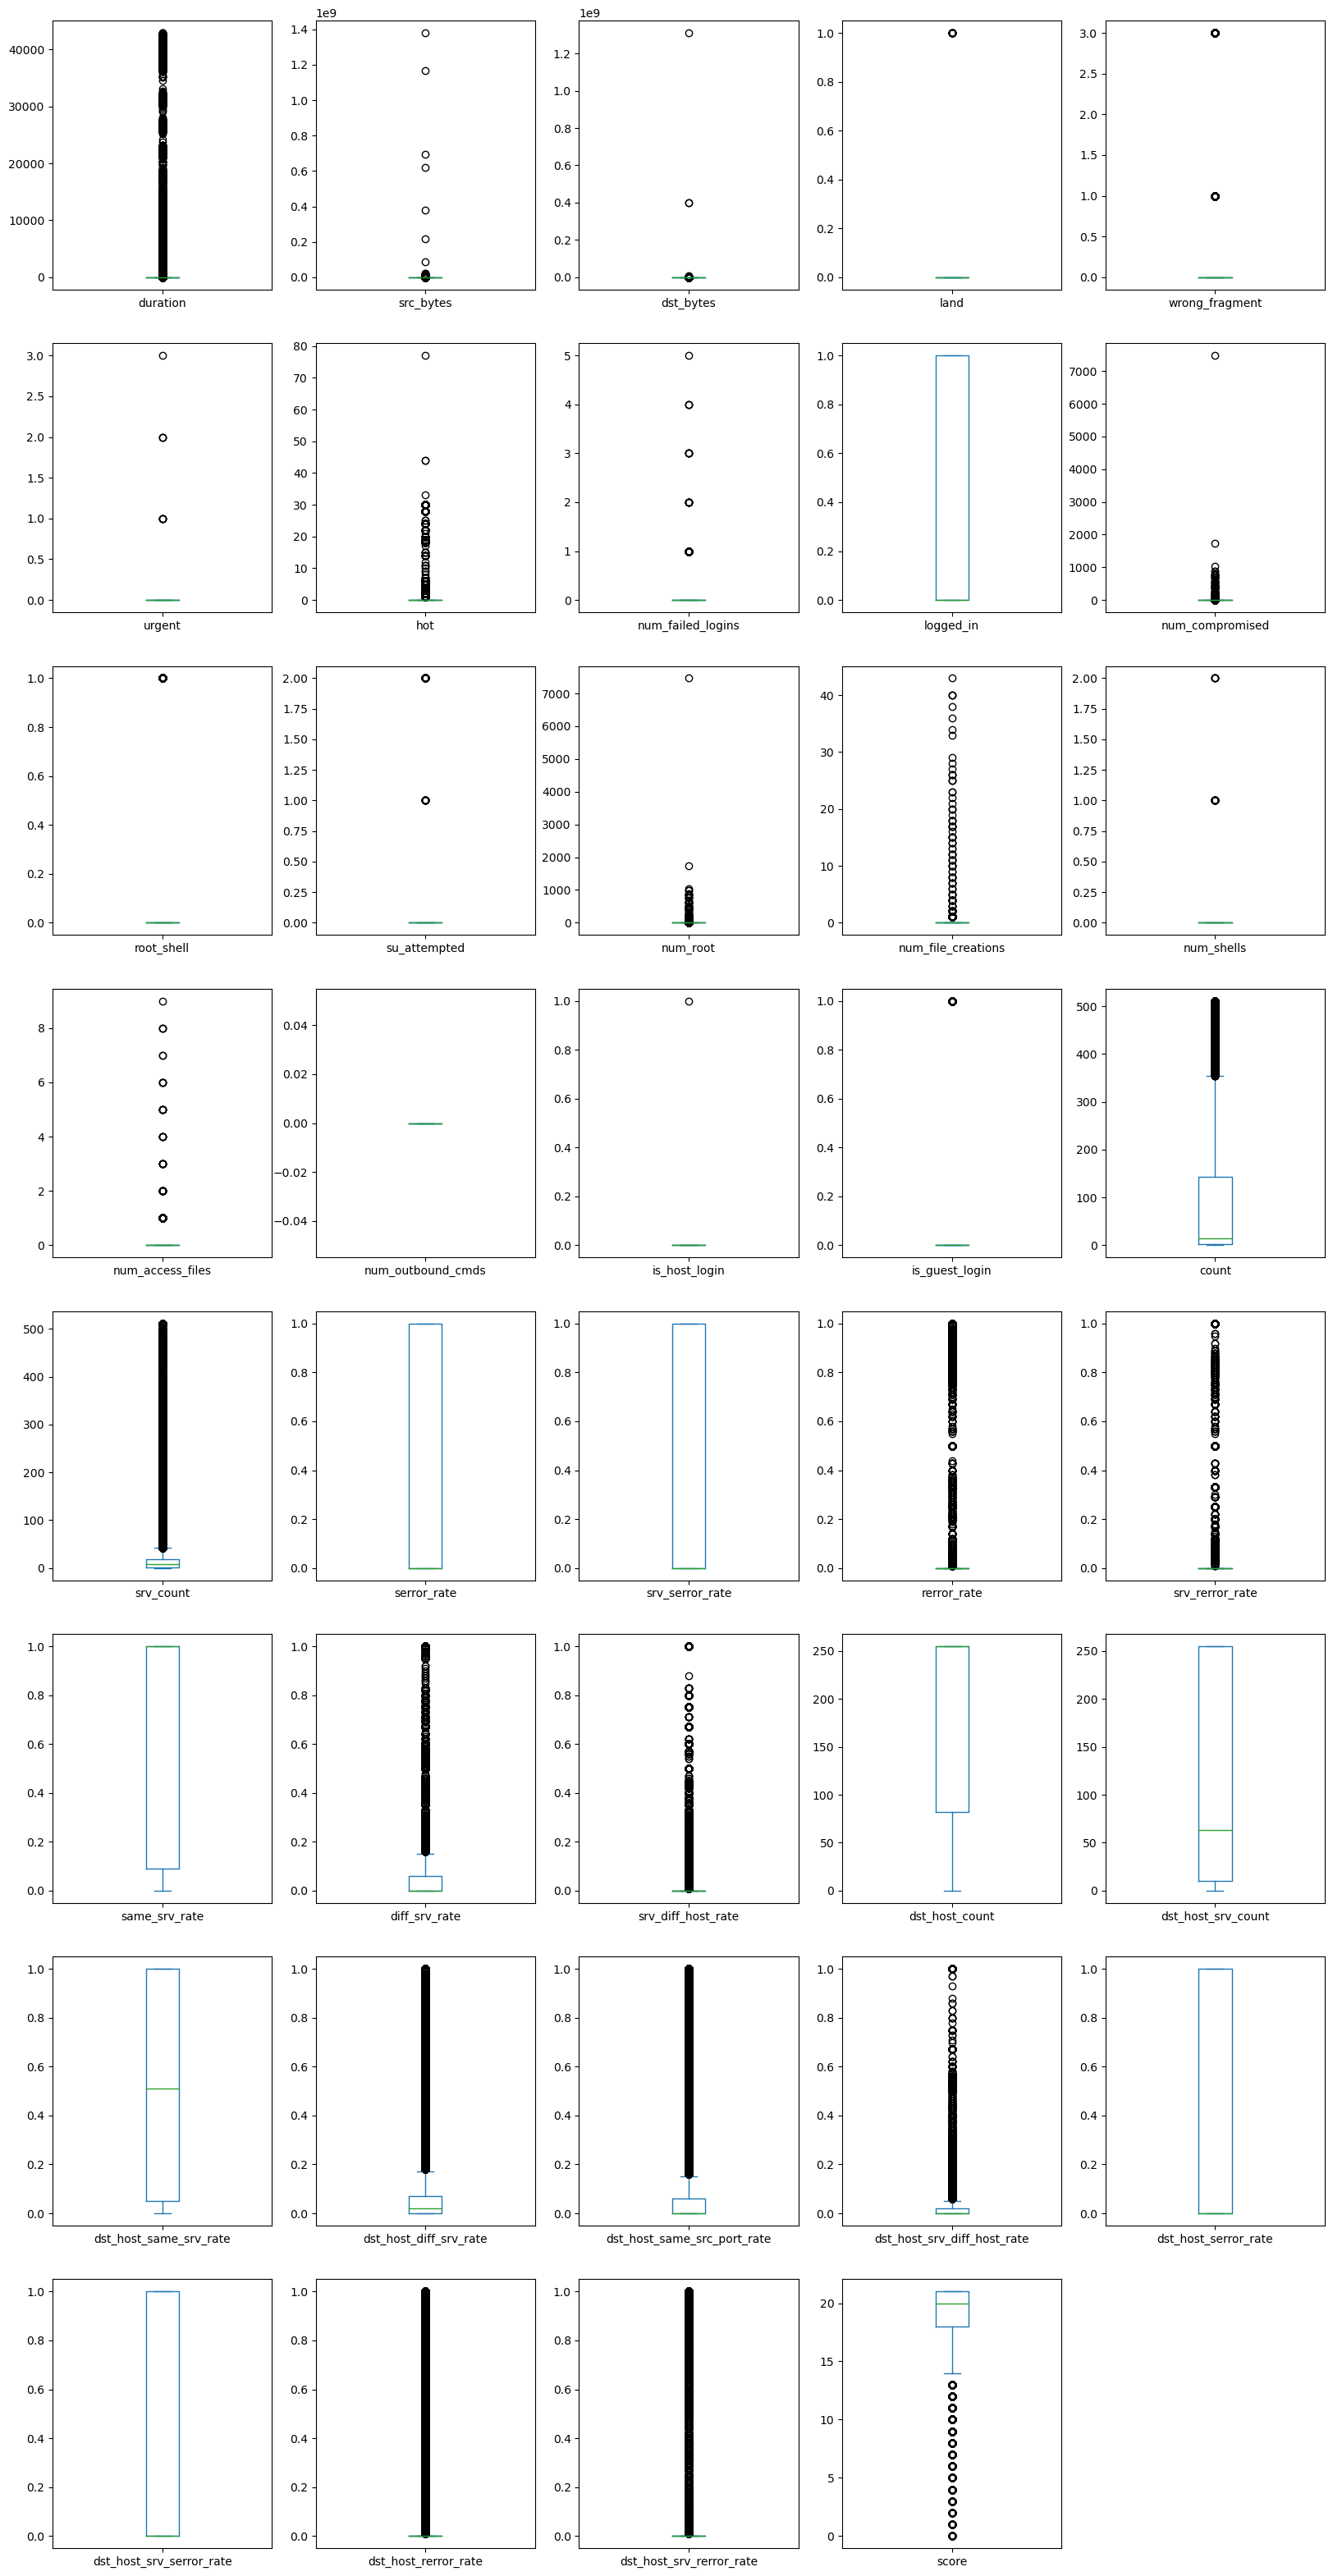

In [9]:
import matplotlib.pyplot as plt

print(train_df.shape)
plt.figure(figsize=(20, 40))
train_df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [ ]:
train_data = Dataset(train_df)
test_data = Dataset(test_df)

train_2_df = train_data.get_label2()
test_2_df = test_data.get_label2()

train_5_df = train_data.get_label5()
test_5_df = test_data.get_label5()

print(train_2_df['label'].value_counts())
print(test_2_df['label'].value_counts())  

print(train_5_df['label'].value_counts())
print(test_5_df['label'].value_counts())


In [59]:
print(train_2_df.groupby(['protocol_type', 'label']).size())
print(test_2_df.groupby(['protocol_type', 'label']).size())

print(train_2_df.groupby(['service', 'label']).size())
print(test_2_df.groupby(['service', 'label']).size())

print(train_2_df.groupby(['flag', 'label']).size())
print(test_2_df.groupby(['flag', 'label']).size())

protocol_type  label 
icmp           attack     6982
               normal     1309
tcp            attack    49089
               normal    53600
udp            attack     2559
               normal    12434
dtype: int64
protocol_type  label 
icmp           attack      950
               normal       93
tcp            attack    11038
               normal     7842
udp            attack      845
               normal     1776
dtype: int64
service    label 
IRC        attack      1
           normal    186
X11        attack      6
           normal     67
Z39_50     attack    862
                    ... 
urp_i      normal    599
uucp       attack    780
uucp_path  attack    689
vmnet      attack    617
whois      attack    693
Length: 92, dtype: int64
service    label 
IRC        attack     3
           normal    10
X11        attack    11
           normal     4
Z39_50     attack    45
                     ..
urp_i      normal    18
uucp       attack    50
uucp_path  attack    46
vmnet 

In [ ]:
# stampa la descrizione delle colonne binarie e trasponi i risultati
print(train_2_df[binary_features].describe().T)
print(test_2_df[binary_features].describe().T)


In [ ]:
# stampa il numero di occorrenze di su_attempted per ogni classe
print(train_2_df.groupby(['su_attempted', 'label']).size())
print(test_2_df.groupby(['su_attempted', 'label']).size())

'su_attempted' dovrebbe essere binario ma ha 3 valori. Sostituiamo '2.0' con '0.0'

In [ ]:
# nella colonna su_attempted sostituisci 2 con 0
train_2_df['su_attempted'] = train_2_df['su_attempted'].replace(2, 0)
test_2_df['su_attempted'] = test_2_df['su_attempted'].replace(2, 0)

train_5_df['su_attempted'] = train_5_df['su_attempted'].replace(2, 0)
test_5_df['su_attempted'] = test_5_df['su_attempted'].replace(2, 0)

print(train_2_df.groupby(['su_attempted', 'label']).size())
print(test_2_df.groupby(['su_attempted', 'label']).size())

print(train_5_df.groupby(['su_attempted', 'label']).size())
print(test_5_df.groupby(['su_attempted', 'label']).size())


In [ ]:
print(len(numeric_features))
print(train_2_df[numeric_features].describe().T)

In [ ]:
print(train_2_df.groupby(['num_outbound_cmds', 'label']).size())
print(test_2_df.groupby(['num_outbound_cmds', 'label']).size())

questa feature ha sempre lo stesso valore quindi possiamo dropparla

In [ ]:
# drop delle colonne num_outbound_cmds
train_2_df = train_2_df.drop('num_outbound_cmds', axis=1)
test_2_df = test_2_df.drop('num_outbound_cmds', axis=1)
train_5_df = train_5_df.drop('num_outbound_cmds', axis=1)
test_5_df = test_5_df.drop('num_outbound_cmds', axis=1)

train_df = train_df.drop('num_outbound_cmds', axis=1)
test_df = test_df.drop('num_outbound_cmds', axis=1)

In [60]:
#  conta le occorrenze di ogni valore diverso delle colonne categoriche
print(train_2_df['protocol_type'].value_counts())
print(test_2_df['protocol_type'].value_counts())

print(train_2_df['service'].value_counts())
print(test_2_df['service'].value_counts())

print(train_2_df['flag'].value_counts())
print(test_2_df['flag'].value_counts())


tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
tcp     18880
udp      2621
icmp     1043
Name: protocol_type, dtype: int64
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
SF        14875
REJ        3850
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Nam